<a href="https://colab.research.google.com/github/harishahamed26/Fashion-MNIST/blob/main/Fashion_MNIST_Image_Classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST - Image-Classificaiton

## Data Loading and EDA

In [2]:
 ! pip install keras-tuner  # Installing keras tuner
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


In [5]:
# Importing of necessary libraries


import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tqdm import tqdm
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import kerastuner as kt


# defining the constant dimension 

RANDOM_SEED = 100

In [6]:
# Loading the Fashion Mnist data from the keras dataset

(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
LabelName = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Normalising the dataset

X_train = X_train.astype(float)/255.0
X_test  = X_test.astype(float)/255.0

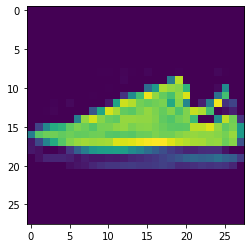

In [8]:
# Viewing of the Loaded Image

plt.imshow(X_train[6])

In [ ]:
# checking the shape of the module
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

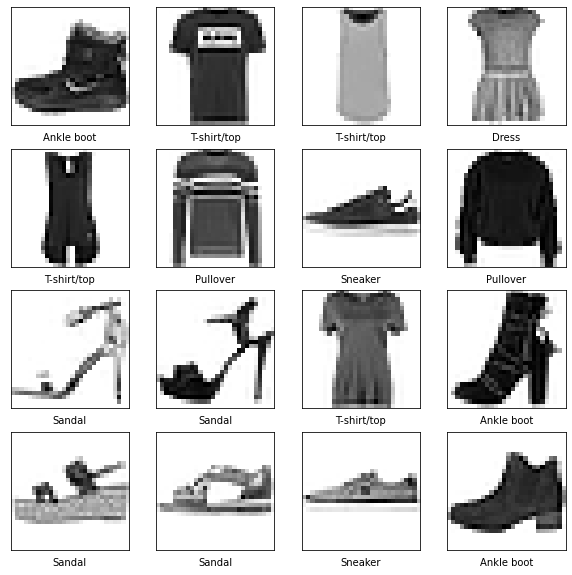

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(LabelName[Y_train[i]])
plt.show()

## Model Generation

In [23]:
from keras.regularizers import Regularizer
# Fixing the random seed
#seed(1)
tf.random.set_seed(RANDOM_SEED)

# Creating a Feed-Forward Neural Network (FFNN)
FFNN = Sequential()
FFNN.add(tf.keras.layers.Input(shape=(28,28, 1)))
FFNN.add(tf.keras.layers.Flatten())
ffnn_filters = [1024, 512, 256, 128, 64, 32]
for n_nodes in ffnn_filters:
    FFNN.add(tf.keras.layers.Dense(n_nodes, activation='relu'))
  #  FFNN.add(tf.keras.layers.Dropout(0.5))  # hidden layer
FFNN.add(tf.keras.layers.Dense(16, activation='relu',kernel_initializer='ones',
    kernel_regularizer=tf.keras.regularizers.L1(0.02)) )
#FFNN.add(tf.keras.layers.Dropout(0.5))  # hidden layer
FFNN.add(tf.keras.layers.Dense(10, activation='softmax'))        # output layer

FFNN.summary()  # Summary of the model


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 1024)              803840    
                                                                 
 dense_31 (Dense)            (None, 512)               524800    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)               

In [ ]:
# Model Plotting using keras plot model 

keras.utils.plot_model(FFNN, to_file='model_plot.png', show_shapes=True,
                       show_layer_names=True)

In [24]:
  # Defining Early Stop method
EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, 
                                          restore_best_weights=True)
FFNN.compile(loss= 'sparse_categorical_crossentropy',
              #optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              optimizer = 'adam',
              metrics = ['accuracy'])

model_history = FFNN.fit(X_train, Y_train, epochs = 80, batch_size = 20, 
                         validation_data = (X_test,Y_test) ,  callbacks = EarlyStop)

Epoch 1/80
3000/3000 [==============================] - 47s 15ms/step - loss: 3.2077 - accuracy: 0.5595 - val_loss: 0.8650 - val_accuracy: 0.7727
Epoch 2/80
3000/3000 [==============================] - 45s 15ms/step - loss: 0.6043 - accuracy: 0.8436 - val_loss: 0.5499 - val_accuracy: 0.8410
Epoch 3/80
3000/3000 [==============================] - 45s 15ms/step - loss: 0.4560 - accuracy: 0.8659 - val_loss: 0.4405 - val_accuracy: 0.8656
Epoch 4/80
3000/3000 [==============================] - 44s 15ms/step - loss: 0.3873 - accuracy: 0.8768 - val_loss: 0.4660 - val_accuracy: 0.8592
Epoch 5/80
3000/3000 [==============================] - 45s 15ms/step - loss: 0.3555 - accuracy: 0.8820 - val_loss: 0.3963 - val_accuracy: 0.8687
Epoch 6/80
3000/3000 [==============================] - 45s 15ms/step - loss: 0.3318 - accuracy: 0.8884 - val_loss: 0.4029 - val_accuracy: 0.8657
Epoch 7/80
3000/3000 [==============================] - 45s 15ms/step - loss: 0.3138 - accuracy: 0.8928 - val_loss: 0.3796 -

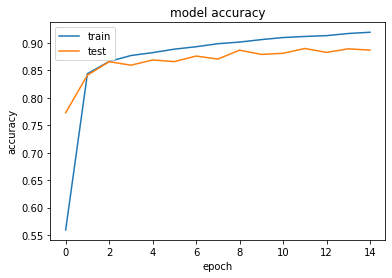

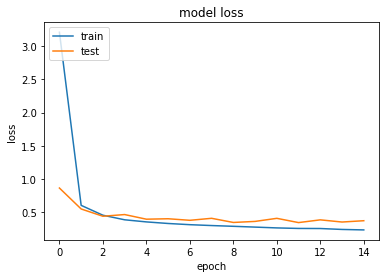

In [25]:
# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     

In [ ]:
ev = FFNN.evaluate(X_test,Y_test)
print(f' Model Accuracy is {(ev[1]* 100):.2f}% and Model Loss : {(ev[0] * 100):.2f}%')


scores_val_accuracy = model_history.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (scores_val_accuracy))



313/313 [==============================] - 2s 5ms/step - loss: 0.3305 - accuracy: 0.8953
 Model Accuracy is 89.53% and Model Loss : 33.05%


Validation Score: 88.44%


## Hyper Tuning 


In [ ]:
from IPython.display import display
import IPython
# define a callback to clear the training outputs at the end of every training step
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
import math
# build the model within a function
# Apply hyperparmeter tuning to the number of units in the second hidden layer in the model
def model_builder(hp):
 
    # Creating a Feed-Forward Neural Network (FFNN)
    FFNN = Sequential()
    FFNN.add(tf.keras.layers.Input(shape=(28,28, 1)))
    FFNN.add(tf.keras.layers.Flatten())
    ffnn_filters = [1024, 512, 256, 128, 64, 32, 16]
    for n_nodes in ffnn_filters:
        FFNN.add(tf.keras.layers.Dense(n_nodes, activation='relu'))
      #  FFNN.add(tf.keras.layers.Dropout(0.1))  # hidden layer
    FFNN.add(tf.keras.layers.Dense(10, activation='softmax'))        # output layer

    FFNN.compile(loss= 'sparse_categorical_crossentropy',
              #optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
              optimizer = 'adam',
              metrics = ['accuracy'])

    return FFNN 
     

In [ ]:

# instatiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 40,
                     factor = 4,        # factor is a number that determines how many models are created to run in parallel whaen testing the hyperparameters
                     directory = 'my_dir',  # directory that the tuned hyperparameter results are stored in (change the name of this directory if you get the message INFO:tensorflow:Oracle triggered exit)
                     project_name = 'intro') 

t = tuner.search(X_train, Y_train, epochs = 40, validation_data = (X_test, Y_test) ,
             callbacks = [ClearTrainingOutput()])
     

In [ ]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

IndexError: ignored

In [ ]:
# apply the optimal hyperparameters to the model and print the summary
Hyper_model = tuner.hypermodel.build(best_hps)
Hyper_model.summary()

NameError: ignored

In [ ]:


# retrain the model with the optimum hyperparameters and train it on the data
HyperTune = Hyper_model.fit(X_train, Y_train, epochs = 200, 
                            validation_data = (X_test, Y_test))
HyperTune_scores = Hyper_model.evaluate(X_test, Y_test, verbose=0)
print('\n')
print("Accuracy: %.2f%%" % (HyperTune_scores[1]*100))


HyperTune_val_accuracy = HyperTune.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (HyperTune_val_accuracy))

In [ ]:


# summarize the history for accuracy
plt.plot(HyperTune.history['accuracy'])
plt.plot(HyperTune.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(HyperTune.history['loss'])
plt.plot(HyperTune.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     